In [41]:
%reset -f
import glob, os, sys, io
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from wavhandler import *
from utils import *

import logging
logger = logging.getLogger()
logger.propagate = False
logger.setLevel(logging.ERROR)
np.random.seed(0)

smpl = 5
aedes = WavHandler('/home/yannis/data/insects/Potamitis/Wingbeats/Aedes', sample_size=smpl, recursive=True)
data, _ = read_simple(aedes.wav_filenames)

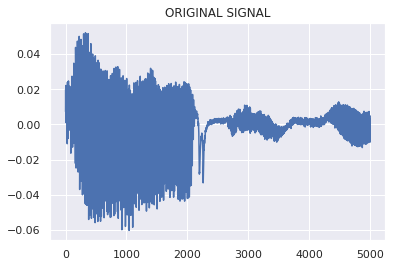

In [42]:
sig = data[:,0]
plt.title("ORIGINAL SIGNAL")
plt.plot(sig)

Text(0.5, 1.0, 'BUTTERSWORTH FILTERED')

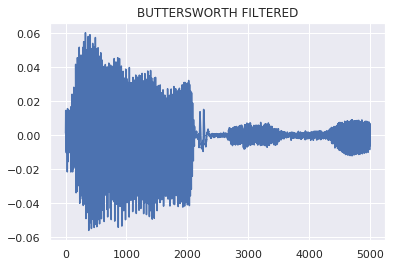

In [43]:
sig_filt = butter_bandpass_filter(data=sig, lowcut=L_CUTOFF, highcut=H_CUTOFF, fs=F_S, order=B_ORDER)
plt.plot(sig_filt)
plt.title('BUTTERSWORTH FILTERED')

In [44]:
crop_hz=2500

Text(0.5, 1.0, 'POWER AMPLITUDES')

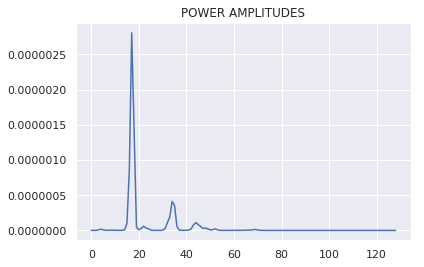

In [57]:
from scipy import signal as sg
from scipy.signal import find_peaks
from sklearn.preprocessing import normalize

# Calculating PSD
freqs, p_amps = sg.welch(sig_filt, fs=F_S, scaling='density', window='hanning', nperseg=256, nfft=None, noverlap=128+64)
plt.plot(p_amps)
plt.title('POWER AMPLITUDES')

Text(0.5, 1.0, 'NORMALIZED AMPLITUDES')

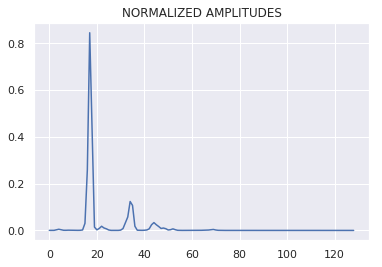

In [56]:
# Normalization of PSD amplitudes
p_amps = normalize(p_amps.reshape(-1,1), norm='l2', axis=0).reshape(-1,)
plt.plot(p_amps)
plt.title('NORMALIZED AMPLITUDES')

In [58]:
psd = pd.concat([pd.Series(freqs), pd.Series(p_amps)], axis=1)
# Cropping up to 2500 Hz (mosquitos don't have more)
psd = psd.iloc[:crop_hz,:]
psd.columns = ['frequency','pow_amp']
psd.head()

,frequency,pow_amp
0,0.00,6.710929e-10
1,31.25,3.842583e-10
2,62.50,9.607550e-10
3,93.75,8.132555e-09
4,125.00,1.649150e-08
